In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('advertising.csv')

df = df.dropna(axis=0)
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


In [30]:
df.columns.values

array(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'], dtype=object)

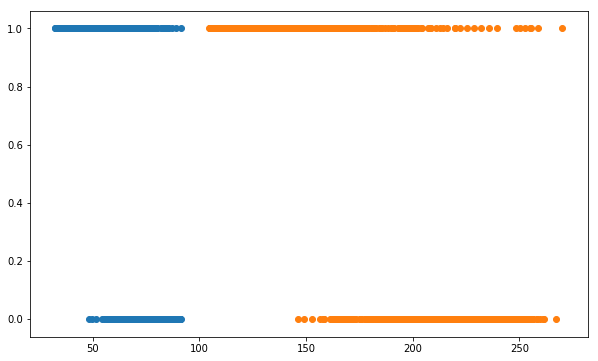

In [39]:
plt.figure(figsize=(10,6))
plt.scatter(df['Daily Time Spent on Site'], df['Clicked on Ad'])
plt.scatter(df['Daily Internet Usage'], df['Clicked on Ad'])
plt.show()

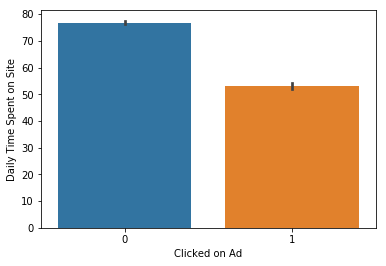

In [49]:
import seaborn as sns

sns.barplot(df['Clicked on Ad'], df['Daily Time Spent on Site'])

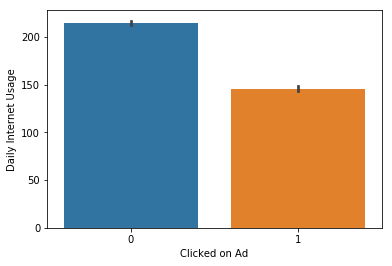

In [50]:
sns.barplot(df['Clicked on Ad'], df['Daily Internet Usage'])

In [95]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df)
train.shape, test.shape

((750, 10), (250, 10))

In [96]:
from sklearn.linear_model import LogisticRegression

x_train = np.array(train[['Daily Time Spent on Site', 'Daily Internet Usage']])
y_train = np.array(train['Clicked on Ad'])
x_test = np.array(test[['Daily Time Spent on Site', 'Daily Internet Usage']])
y_test = np.array(test['Clicked on Ad'])

model = LogisticRegression(solver='lbfgs')

model.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [155]:
from sklearn.metrics import accuracy_score

pred = model.predict(x_test)
acc = accuracy_score(pred, y_test)

# for a,b in zip(pred, y_test):
#     print(a,b)
    
acc

0.964

In [98]:
b0 = np.asscalar(model.intercept_)
coefs = np.squeeze(model.coef_)
b1 = coefs[0]
b2 = coefs[1]

print('alpha =', b0,'+',b1,'*x1 +',b2,'*x2')

alpha = 20.17204118148021 + -0.14204115700333872 *x1 + -0.05878779373258838 *x2


In [153]:
from math import exp

# x1 = time spent
# x2 = internet usage
def getProbability(x1, x2):  
    alpha = b0 + (b1*x1) + (b2*x2)
    p = exp(alpha) / (1 + exp(alpha))
    return p

prob1 = getProbability(123, 152)
odds1 = prob1 / (1-prob1)

prob2 = getProbability(124, 152)
odds2 = prob2 / (1-prob2)

print('Odds ratio for 1 unit increase in time spent:',odds2/odds1)
print('approx 13.24% decrease')

0.0019600882577604606 0.0017005442462759027
Odds ratio for 1 unit increase in time spent: 0.8675855485297864


In [154]:
prob1 = getProbability(123, 209.872)
odds1 = prob1 / (1-prob1)

prob2 = getProbability(123, 210.872)
odds2 = prob2 / (1-prob2)

print('Odds ratio for 1 unit increase in time spent:',odds2/odds1)
print('approx 5.71% decrease')

Odds ratio for 1 unit increase in time spent: 0.9429068386690966
approx 5.71% decrease
